In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1269.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/623.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/820.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1354.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/45.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/369.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1711.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1173.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1488.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/436.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1409.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/71.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1055.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/215.jpg
/

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory('/kaggle/input/skin-cancer-malignant-vs-benign/train',
target_size=(64, 64),
batch_size=32,
class_mode='binary')

test_set = test_datagen.flow_from_directory('/kaggle/input/skin-cancer-malignant-vs-benign/test',
target_size=(64, 64),
batch_size=32,
class_mode='binary')


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.fit(training_set, epochs=10, validation_data=test_set)


Epoch 1/10
83/83 [==============================] - 16s 175ms/step - loss: 0.6290 - accuracy: 0.6519 - val_loss: 0.4950 - val_accuracy: 0.7409
Epoch 2/10
83/83 [==============================] - 14s 173ms/step - loss: 0.4792 - accuracy: 0.7660 - val_loss: 0.4168 - val_accuracy: 0.7985
Epoch 3/10
83/83 [==============================] - 14s 170ms/step - loss: 0.4357 - accuracy: 0.7808 - val_loss: 0.3989 - val_accuracy: 0.7818
Epoch 4/10
83/83 [==============================] - 14s 169ms/step - loss: 0.4097 - accuracy: 0.8032 - val_loss: 0.3728 - val_accuracy: 0.8288
Epoch 5/10
83/83 [==============================] - 14s 172ms/step - loss: 0.3978 - accuracy: 0.7986 - val_loss: 0.4382 - val_accuracy: 0.7682
Epoch 6/10
83/83 [==============================] - 14s 169ms/step - loss: 0.3937 - accuracy: 0.7998 - val_loss: 0.3675 - val_accuracy: 0.8318
Epoch 7/10
83/83 [==============================] - 14s 172ms/step - loss: 0.3782 - accuracy: 0.8081 - val_loss: 0.3652 - val_accuracy: 0.8182

1/1 [==============================] - 0s 26ms/step


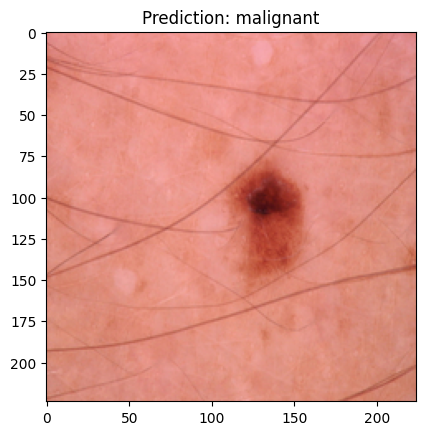

In [19]:
 # Load and preprocess the test image
test_image = image.load_img('/kaggle/input/skin-cancer-malignant-vs-benign/test/benign/1180.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
# Make a prediction
result = model.predict(test_image)
# Get the class label (benign or malignant)
if result[0][0] == 1:
    prediction = 'benign'
else:
    prediction = 'malignant'
# Display the image
plt.imshow(image.load_img('/kaggle/input/skin-cancer-malignant-vs-benign/data/train/benign/1431.jpg'))
plt.title(f'Prediction: {prediction}')
plt.show()